In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [ ]:
img=load_img(path+'/Test_Images_crop/Assia/Assia_Madani-happy-1.jpg',target_size=(224,224))
print(img)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB3ADD6E4A0>


In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Project/haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')

In [ ]:
path = '/content/drive/MyDrive/Project/lfw_/Dataset'

In [ ]:
image_path_names=[]
person_names=set()

for file_name in glob.glob(path+'/Images_train/*/*.jpg'):
  # Get images path stored in folder
  image_path_names.append(file_name)
  # Get persons names
  person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])

In [ ]:
for file_name in image_path_names:

    img = cv2.imread(file_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    left, top, right, bottom = 0, 0, 0, 0

    if len(rects) != 1:
          continue

    left, top, right, bottom = rects[0]

    img_crop = img[top:top + bottom, left:left + right]
    img_path = path + '/Images_crop/' + file_name.split('/')[-1].split('_')[0] + '/' + file_name.split('/')[-1]

    try:
        os.makedirs(os.path.dirname(img_path), exist_ok=True)  # Create the necessary directories
        cv2.imwrite(img_path, img_crop)
        print(f"Image saved: {img_path}")

    except Exception as e:
        print(f"Failed to save image: {img_path}")
        print(f"Error: {str(e)}")

Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-happy-4.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-happy-5.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-happy-6.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-happy-7.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-happy-8.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-angry-2.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-angry-3.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Assia/Assia_Madani-neutral-1.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Yahia/Yahia_boukharouba-angry-1.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Images_crop/Yahia/Yahia_boukharouba-

In [ ]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
# Load VGG Face model weights
model.load_weights('/content/drive/MyDrive/Project/vgg_face_weights.h5')

In [ ]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [ ]:
vgg_face.save('/content/drive/MyDrive/Project/vgg_f.h5')

In [ ]:
#Prepare Training Data
x_train=[]
y_train=[]

person_folders=os.listdir('/content/drive/MyDrive/Project/lfw_/Dataset/Corped_augmented/')
person_rep=dict()

print(person_folders)

for i,person in enumerate(person_folders):

  person_rep[i]=person

  image_names=os.listdir('/content/drive/MyDrive/Project/lfw_/Dataset/Corped_augmented/'+person+'/')

  for image_name in image_names:

    img=load_img(path+'/Corped_augmented/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)

    # Convert the embedding vector to an array, squeezing the array to remove any single dimensional entries
    #Append the embedding vector to the x_train list
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())

    #Append the label (i) to the y_train list.
    y_train.append(i)

['Yahia', 'Amine', 'Rabeh', 'Ilyas', 'abdelmalek', 'Ayoub', 'Walid', 'Karim', 'Abdelali', 'Ahmed', 'Yacine', 'Houssem', 'Abdlelkader ', 'Sabrina', 'Celia', 'Katia', 'Kamelia', 'Assia']


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
from keras.utils import to_categorical

# Convert the target data to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=18)

In [ ]:
input_shape = (x_train.shape[1],)

In [ ]:
classifier = Sequential()
classifier.add(Flatten(input_shape=input_shape))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(18, activation='softmax'))


In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2622)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               335744    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 18)                1170      
                                                                 
Total params: 345,170
Trainable params: 345,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = classifier.fit(x_train, y_train_encoded, epochs=30, batch_size=32)

Epoch 1/30
36/36 [==============================] - 1s 3ms/step - loss: 0.9799 - accuracy: 0.7509
Epoch 2/30
36/36 [==============================] - 0s 4ms/step - loss: 0.2051 - accuracy: 0.9450
Epoch 3/30
36/36 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9468
Epoch 4/30
36/36 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9672
Epoch 5/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9849
Epoch 6/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9867
Epoch 7/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9885
Epoch 8/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9956
Epoch 9/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 10/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 11/30
36/36 [

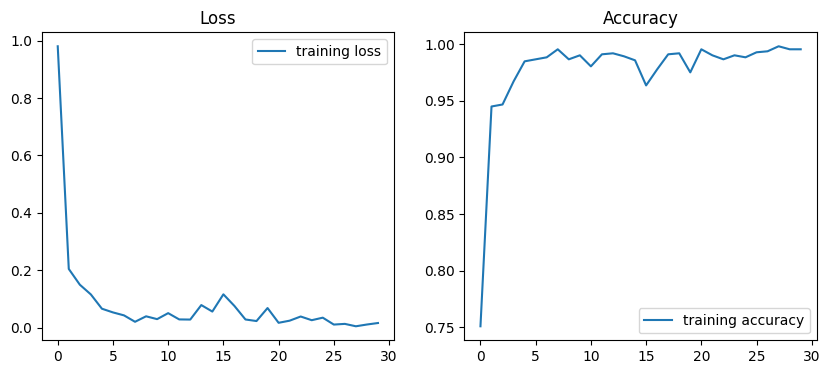

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training loss')
plt.legend()
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.legend()
plt.title(f"Accuracy")
plt.show()

In [ ]:
# Get Image names stored in Images folder
image_test_names=[]
test_names=set()
for file_name in glob.glob(path+'/Images_test/*.jpg'):
  image_test_names.append(file_name)
  test_names.add(image_test_names[-1].split('/')[-1].split('_')[0])

In [ ]:
test_names

{'Abdelali',
 'Abdlelkader ',
 'Ahmed',
 'Amine',
 'Assia',
 'Ayoub',
 'Celia',
 'Houssem',
 'Ilyas',
 'Kamelia',
 'Karim',
 'Katia',
 'Rabeh',
 'Sabrina',
 'Walid',
 'Yacine',
 'Yahia'}

In [ ]:
for file_name in image_test_names:
  print(file_name)

  img = cv2.imread(file_name)

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  rects = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

  left, top, right, bottom = 0, 0, 0, 0

  # if len(rects) != 1:
  #         continue

  left, top, right, bottom = rects[0]

  img_crop = img[top:top + bottom, left:left + right]
  img_path = path + '/Test_Images_crop/' + file_name.split('/')[-1].split('_')[0] + '/' + file_name.split('/')[-1]

  try:

    os.makedirs(os.path.dirname(img_path), exist_ok=True)  # Create the necessary directories
    cv2.imwrite(img_path, img_crop)
    print(f"Image saved: {img_path}")
  except Exception as e:
    print(f"Failed to save image: {img_path}")
    print(f"Error: {str(e)}")

/content/drive/MyDrive/Project/lfw_/Dataset/Images_test/Celia_Lazili-neutral-3.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/Celia/Celia_Lazili-neutral-3.jpg
/content/drive/MyDrive/Project/lfw_/Dataset/Images_test/Assia_Madani-happy-1.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/Assia/Assia_Madani-happy-1.jpg
/content/drive/MyDrive/Project/lfw_/Dataset/Images_test/Amine_lasheb-neutral-2.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/Amine/Amine_lasheb-neutral-2.jpg
/content/drive/MyDrive/Project/lfw_/Dataset/Images_test/Ayoub_frihaoui-happy-1.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/Ayoub/Ayoub_frihaoui-happy-1.jpg
/content/drive/MyDrive/Project/lfw_/Dataset/Images_test/Ilyas_Alili-happy-1.jpg
Image saved: /content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/Ilyas/Ilyas_Alili-happy-1.jpg
/content/drive/MyDrive/Project/lfw_/Dataset/Images_test/Rabe

In [ ]:
#Prepare Test Data
x_test=[]
y_test=[]
#predictions_=[]

def find_index_by_name(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
person_folders=os.listdir(path+'/Test_Images_crop/')

for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/'+person+'/')

  for image_name in image_names:

    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)

    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    index = find_index_by_name(person_rep,person)
    y_test.append(index)
    print("true")
    #name = recognize_face(img_encode)
    #predictions_.append(name)

    #print("the real person:",image_name)
    #print("the predicted person:",name,"-->",person_rep[name])
    #print("_____________________________\n")

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
y_test

array([ 4, 17,  1,  5,  3,  2,  6,  6,  6,  0,  0,  0,  7, 13, 14, 10, 12,
        8,  9, 16, 15, 11])

In [ ]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [ ]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')


In [ ]:
person_rep

{0: 'Yahia',
 1: 'Amine',
 2: 'Rabeh',
 3: 'Ilyas',
 4: 'abdelmalek',
 5: 'Ayoub',
 6: 'Walid',
 7: 'Karim',
 8: 'Abdelali',
 9: 'Ahmed',
 10: 'Yacine',
 11: 'Houssem',
 12: 'Abdlelkader ',
 13: 'Sabrina',
 14: 'Celia',
 15: 'Katia',
 16: 'Kamelia',
 17: 'Assia'}

In [ ]:
predictions_ = []
for person_name in os.listdir('/content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/'):
  for img_name in os.listdir('/content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/'+person_name+'/'):

    # Load Image
      img=cv2.imread('/content/drive/MyDrive/Project/lfw_/Dataset/Test_Images_crop/'+person_name+'/'+img_name)

      img_crop = cv2.resize(img,(224, 224))
      crop_img=img_to_array(img_crop)
      crop_img=np.expand_dims(crop_img,axis=0)
      crop_img=preprocess_input(crop_img)
      img_encode=vgg_face(crop_img)
      classifier_prediction = classifier.predict(img_encode)
      predicted_index = np.argmax(classifier_prediction, axis=1)
      predictions_.append(int(predicted_index))

      print("the real person:",img_name)
      print("the predicted person:",person_rep[int(predicted_index)])
      print("_____________________________\n")


1/1 [==============================] - 0s 70ms/step
the real person: abdelmalek_bounoua-tired-5.jpg
the predicted person: abdelmalek
_____________________________

1/1 [==============================] - 0s 14ms/step
the real person: Assia_Madani-happy-1.jpg
the predicted person: Assia
_____________________________

1/1 [==============================] - 0s 15ms/step
the real person: Amine_lasheb-neutral-2.jpg
the predicted person: Amine
_____________________________

1/1 [==============================] - 0s 16ms/step
the real person: Ayoub_frihaoui-happy-1.jpg
the predicted person: Ayoub
_____________________________

1/1 [==============================] - 0s 14ms/step
the real person: Ilyas_Alili-happy-1.jpg
the predicted person: Ilyas
_____________________________

1/1 [==============================] - 0s 15ms/step
the real person: Rabeh_Aouar-happy-1.jpg
the predicted person: Rabeh
_____________________________

1/1 [==============================] - 0s 14ms/step
the real person: 

In [ ]:
predictions_

[4, 17, 1, 5, 3, 2, 6, 6, 6, 0, 0, 0, 7, 13, 14, 10, 12, 8, 9, 16, 15, 11]

In [ ]:
y_test

array([ 4, 17,  1,  5,  3,  2,  6,  6,  6,  0,  0,  0,  7, 13, 14, 10, 12,
        8,  9, 16, 15, 11])

In [ ]:
class_labels = ['Assia','Yahia','Amine','Rabeh','Ilyas','abdelmalek','Ayoub','Walid','Karim','Abdelali','Ahmed','Yacine','Houssem','Abdlelkader','Sabrina','Celia','Katia','Kamelia']

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predictions_,target_names=class_labels)

print(report)

              precision    recall  f1-score   support

       Assia       1.00      1.00      1.00         3
       Yahia       1.00      1.00      1.00         1
       Amine       1.00      1.00      1.00         1
       Rabeh       1.00      1.00      1.00         1
       Ilyas       1.00      1.00      1.00         1
  abdelmalek       1.00      1.00      1.00         1
       Ayoub       1.00      1.00      1.00         3
       Walid       1.00      1.00      1.00         1
       Karim       1.00      1.00      1.00         1
    Abdelali       1.00      1.00      1.00         1
       Ahmed       1.00      1.00      1.00         1
      Yacine       1.00      1.00      1.00         1
     Houssem       1.00      1.00      1.00         1
 Abdlelkader       1.00      1.00      1.00         1
     Sabrina       1.00      1.00      1.00         1
       Celia       1.00      1.00      1.00         1
       Katia       1.00      1.00      1.00         1
     Kamelia       1.00    

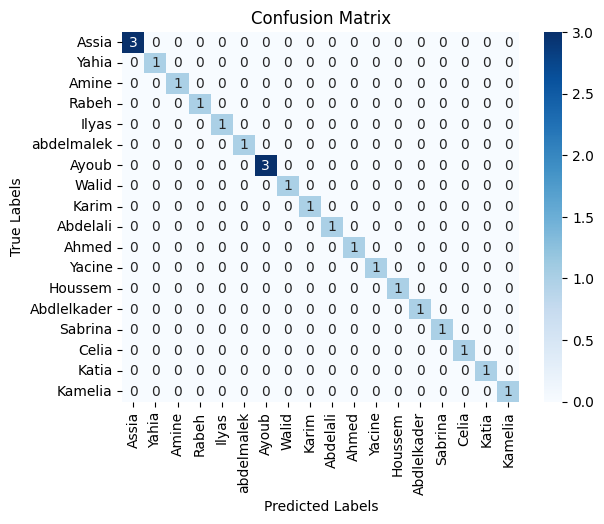

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions_)
class_labels = ['Assia','Yahia','Amine','Rabeh','Ilyas','abdelmalek','Ayoub','Walid','Karim','Abdelali','Ahmed','Yacine','Houssem','Abdlelkader','Sabrina','Celia','Katia','Kamelia']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# plt.xticks(ticks=)
# plt.yticks(ticks=[0, 1, 2])

# Display the plot
plt.show()

In [ ]:
classifier.save('classifier_face.h5')

In [ ]:
from keras.models import load_model
model_ = load_model('classifier_face.h5')

OSError: ignored

In [ ]:
# Save the model architecture to JSON file
model_json = classifier.to_json()
with open('/content/drive/MyDrive/Project/classifier_face_last_version.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5 file
classifier.save_weights('/content/drive/MyDrive/Project/classifier_face_weights_last_version.h5')